<a href="https://colab.research.google.com/github/unmiulast/my-first-repo/blob/main/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas==2.2.2
!pip install matplotlib==3.10.0
!pip install seaborn==0.13.2
!pip install scikit-learn==1.6.1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [ ]:
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
# 不要なカラムを除外
df = df.drop(["alive", "class", "who"], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   adult_male   891 non-null    bool    
 9   deck         203 non-null    category
 10  embark_town  889 non-null    object  
 11  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.7+ KB


In [ ]:
# 数値型とカテゴリ型に分ける
num_cols = df.select_dtypes(include="number").columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns

In [ ]:
# 欠損値補完
for col in num_cols:
  df[col] = df[col].fillna(df[col].mean())

for col in cat_cols:
  df[col] = df[col].fillna(df[col].mode())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   adult_male   891 non-null    bool    
 9   deck         204 non-null    category
 10  embark_town  891 non-null    object  
 11  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.7+ KB


In [ ]:
df["embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
# カテゴリ変数をダミー変数化
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.000000,1,0,7.2500,True,False,True,False,True,False,True,False,False,False,False,False,True
1,1,1,38.000000,1,0,71.2833,False,False,False,False,False,False,True,False,False,False,False,False,False
2,1,3,26.000000,0,0,7.9250,False,True,False,False,True,False,False,False,False,False,False,False,True
3,1,1,35.000000,1,0,53.1000,False,False,False,False,True,False,True,False,False,False,False,False,True
4,0,3,35.000000,0,0,8.0500,True,True,True,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,True,True,True,False,True,False,False,False,False,False,False,False,True
887,1,1,19.000000,0,0,30.0000,False,True,False,False,True,True,False,False,False,False,False,False,True
888,0,3,29.699118,1,2,23.4500,False,False,False,False,True,False,False,False,False,False,False,False,True
889,1,1,26.000000,0,0,30.0000,True,True,True,False,False,False,True,False,False,False,False,False,False


In [ ]:
x = df.drop("survived", axis=1)
y = df[["survived"]]

display(x)
display(y)

,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton
0,3,22.000000,1,0,7.2500,True,False,True,False,True,False,True,False,False,False,False,False,True
1,1,38.000000,1,0,71.2833,False,False,False,False,False,False,True,False,False,False,False,False,False
2,3,26.000000,0,0,7.9250,False,True,False,False,True,False,False,False,False,False,False,False,True
3,1,35.000000,1,0,53.1000,False,False,False,False,True,False,True,False,False,False,False,False,True
4,3,35.000000,0,0,8.0500,True,True,True,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,True,True,True,False,True,False,False,False,False,False,False,False,True
887,1,19.000000,0,0,30.0000,False,True,False,False,True,True,False,False,False,False,False,False,True
888,3,29.699118,1,2,23.4500,False,False,False,False,True,False,False,False,False,False,False,False,True
889,1,26.000000,0,0,30.0000,True,True,True,False,False,False,True,False,False,False,False,False,False


,survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
# モデル構築
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8432835820895522

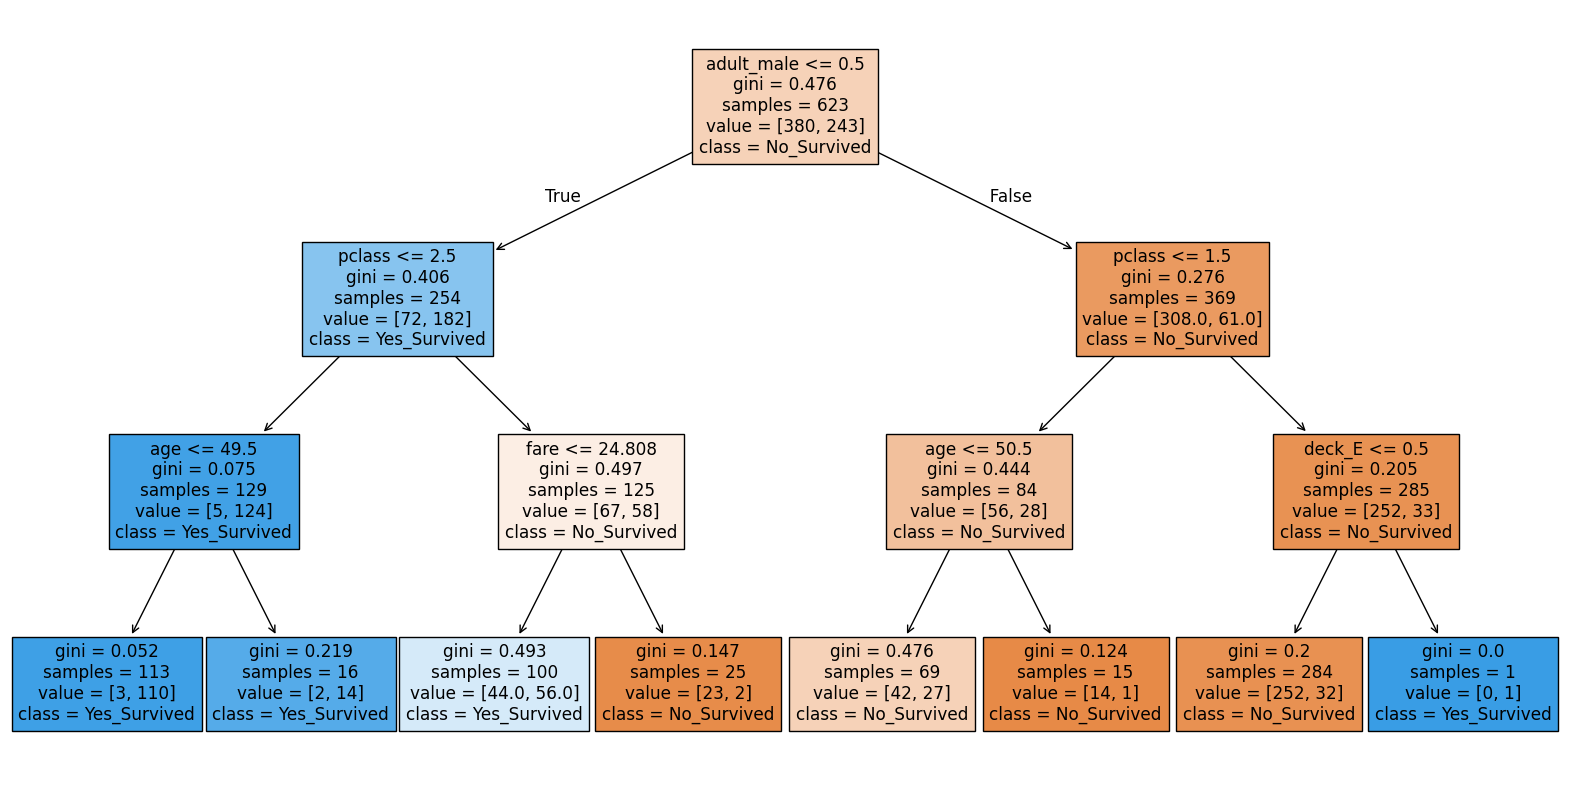

In [ ]:
# 決定木のグラフ表示
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=x.columns, class_names=["No_Survived", "Yes_Survived"], filled=True)
plt.show()

In [ ]:
# 変数重要度
importance = pd.Series(model.feature_importances_, index=x.columns)
importance.sort_values(ascending=False)

,0
adult_male,0.641070
pclass,0.263188
fare,0.064623
age,0.020116
deck_E,0.011003
parch,0.000000
alone,0.000000
sex_male,0.000000
embarked_Q,0.000000
sibsp,0.000000
